In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [4]:
pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [7]:
!pip install wordcloud

zsh:1: command not found: pip


In [8]:
pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import os
os.listdir("Downloads")

['WhatsApp Image 2026-01-21 at 2.59.08 AM.jpeg',
 'Unknown-5.jpg',
 'Untitled.p12',
 'IMG_2899.MOV',
 'Pink and Cream Diwali Sale WhatsApp Status-5.jpg',
 'IMG_6427.MOV',
 'TE_SEM-V_TOC Technical.pdf',
 ' -12.jpg',
 'mysql-9.5.0-macos15-arm64.dmg',
 'SE Data Science Name List.pdf',
 'googlechrome.dmg',
 'IMG_7498.MOV',
 'IMG_3826.MOV',
 'XII poem 2.2 Indian Weavers - appreciation.docx',
 'IMG_0485.MOV',
 'Pink and Cream Diwali Sale WhatsApp Status-10.jpg',
 'IMG_5264.MOV',
 'Untitled10.ipynb',
 'Lisa or lena.jpg',
 'IMG_0452.MOV',
 'Project-Title-Phishing-Website-Detection-Using-Machine-Learning.pptx',
 ' -3.jpg',
 'DocScanner 01-Mar-2025 7-16\u202fpm.pdf',
 'IMG_2906.MOV',
 'IMG_0877.MOV',
 'IMG_5099.MOV',
 'IMG_8556.MOV',
 'IMG_1572.MOV',
 'WhatsApp Image 2025-03-25 at 5.52.22 PM-2.jpeg',
 'May_Jun_2023 (1).pdf',
 'IMG_7895.MOV',
 'Kernel & FCFS (2).pdf',
 'cultural diversity.pages',
 'NETZWERK NEU A2 KURSBUCH.pdf',
 'IMG_7102.MOV',
 'Visual Studio Code.app',
 'Untitled 3.pdf',
 'HSC

In [12]:
os.listdir("Downloads/aclImdb/train")

['urls_unsup.txt',
 'neg',
 'urls_pos.txt',
 'unsup',
 'urls_neg.txt',
 'pos',
 'unsupBow.feat',
 'labeledBow.feat']

In [13]:
import os
import pandas as pd

base_path = "Downloads/aclImdb/train"

reviews = []
sentiments = []

for sentiment in ["pos", "neg"]:
    folder_path = os.path.join(base_path, sentiment)

    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
                reviews.append(f.read())
                sentiments.append(sentiment)

df = pd.DataFrame({
    "review": reviews,
    "sentiment": sentiments
})

df.to_csv("imdb_reviews.csv", index=False)
print("CSV file created successfully!")
df.head()

CSV file created successfully!


,review,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [14]:
# Load dataset
df = pd.read_csv("imdb_reviews.csv")   # change filename if needed

# View first 5 rows
df.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [16]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [17]:
df['sentiment'].value_counts()

sentiment
pos    12500
neg    12500
Name: count, dtype: int64

In [18]:
## 2. Sentiment Label Distribution

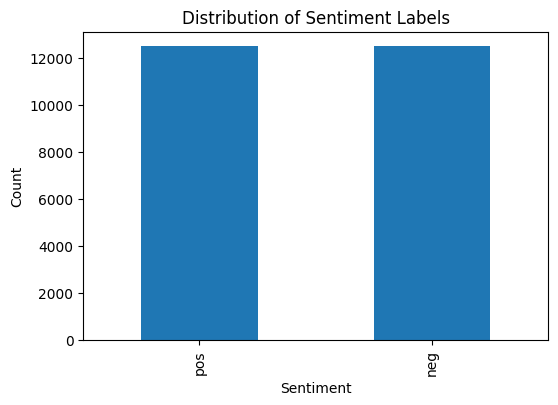

In [19]:
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

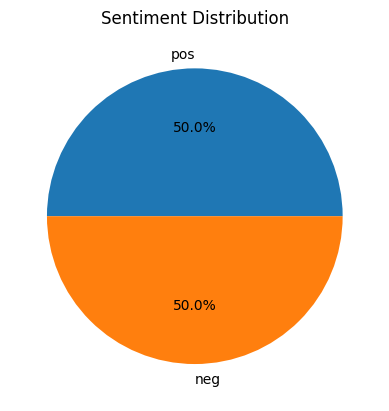

In [20]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

In [21]:
## 3. Text Data Exploration

In [22]:
# Sample positive reviews
df[df['sentiment']=="positive"]['review'].head(3)

Series([], Name: review, dtype: object)

In [23]:
# Sample negative reviews
df[df['sentiment']=="negative"]['review'].head(3)

Series([], Name: review, dtype: object)

In [24]:
# Sample neutral reviews
df[df['sentiment']=="neutral"]['review'].head(3)

Series([], Name: review, dtype: object)

In [25]:
df['review_length'] = df['review'].apply(len)

df['review_length'].describe()

count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: review_length, dtype: float64

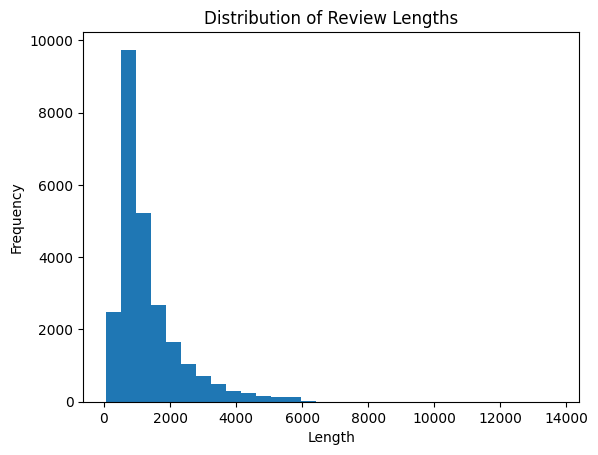

In [26]:
plt.hist(df['review_length'], bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [27]:
all_words = " ".join(df['review']).split()
vocab_size = len(set(all_words))
vocab_size

280617

In [28]:
## 4. Text Preprocessing

In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    

    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [30]:
df['clean_review'] = df['review'].apply(preprocess_text)
df[['review','clean_review']].head()

,review,clean_review
0,For a movie that gets no respect there sure ar...,movie get respect sure lot memorable quote lis...
1,Bizarre horror movie filled with famous faces ...,bizarre horror movie filled famous face stolen...
2,"A solid, if unremarkable film. Matthau, as Ein...",solid unremarkable film matthau einstein wonde...
3,It's a strange feeling to sit alone in a theat...,strange feeling sit alone theater occupied par...
4,"You probably all already know this by now, but...",probably already know additional episode never...


In [31]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swarlaxmidhamale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
df['clean_review'] = df['review'].apply(preprocess_text)

In [33]:
df['clean_review'] = df['review'].apply(preprocess_text)
df[['review','clean_review']].head()

,review,clean_review
0,For a movie that gets no respect there sure ar...,movie get respect sure lot memorable quote lis...
1,Bizarre horror movie filled with famous faces ...,bizarre horror movie filled famous face stolen...
2,"A solid, if unremarkable film. Matthau, as Ein...",solid unremarkable film matthau einstein wonde...
3,It's a strange feeling to sit alone in a theat...,strange feeling sit alone theater occupied par...
4,"You probably all already know this by now, but...",probably already know additional episode never...


In [34]:
df['clean_review'].head(5)

0    movie get respect sure lot memorable quote lis...
1    bizarre horror movie filled famous face stolen...
2    solid unremarkable film matthau einstein wonde...
3    strange feeling sit alone theater occupied par...
4    probably already know additional episode never...
Name: clean_review, dtype: object

In [35]:
## 5. Visualization of Preprocessed Text

In [36]:
df[df['sentiment']=="positive"]['clean_review']

Series([], Name: clean_review, dtype: object)

In [37]:
df['sentiment'].value_counts()

sentiment
pos    12500
neg    12500
Name: count, dtype: int64

In [38]:
df[df['sentiment']=="positive"].head()

,review,sentiment,review_length,clean_review


In [39]:
positive_text = " ".join(df[df['sentiment']=="pos"]['clean_review'])

In [40]:
positive_text = " ".join(df[df['sentiment']==1]['clean_review'])

In [41]:
df['clean_review'].isna().sum()
df['clean_review'].head(10)

0    movie get respect sure lot memorable quote lis...
1    bizarre horror movie filled famous face stolen...
2    solid unremarkable film matthau einstein wonde...
3    strange feeling sit alone theater occupied par...
4    probably already know additional episode never...
5    saw movie two grown child although clever shre...
6    youre using imdbbr br youve given hefty vote f...
7    good film powerful message love redemption lov...
8    made quartet trio continued quality earlier fi...
9    mature man admit shed tear film mature respons...
Name: clean_review, dtype: object

In [42]:
positive_text = " ".join(
    df[(df['sentiment']=="pos") & (df['clean_review'].str.len() > 0)]['clean_review']
)

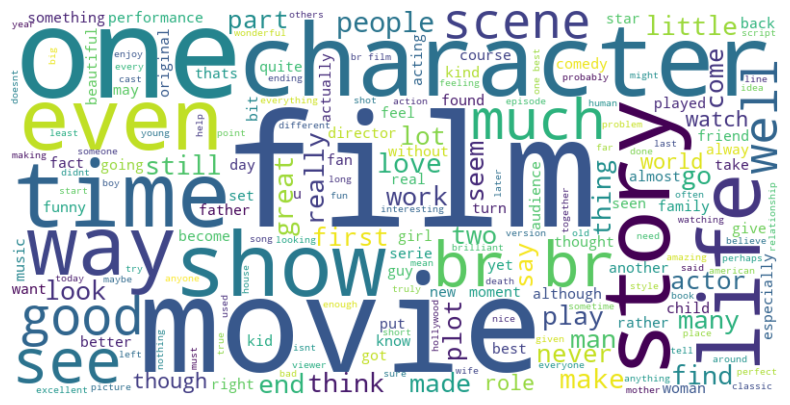

In [43]:
text = positive_text.strip()

if len(text) == 0:
    print("No words found for WordCloud. Check your sentiment labels and clean_review column.")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [44]:
df[['review','clean_review','sentiment']].head(10)

,review,clean_review,sentiment
0,For a movie that gets no respect there sure ar...,movie get respect sure lot memorable quote lis...,pos
1,Bizarre horror movie filled with famous faces ...,bizarre horror movie filled famous face stolen...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",solid unremarkable film matthau einstein wonde...,pos
3,It's a strange feeling to sit alone in a theat...,strange feeling sit alone theater occupied par...,pos
4,"You probably all already know this by now, but...",probably already know additional episode never...,pos
5,I saw the movie with two grown children. Altho...,saw movie two grown child although clever shre...,pos
6,You're using the IMDb.<br /><br />You've given...,youre using imdbbr br youve given hefty vote f...,pos
7,This was a good film with a powerful message o...,good film powerful message love redemption lov...,pos
8,"Made after QUARTET was, TRIO continued the qua...",made quartet trio continued quality earlier fi...,pos
9,"For a mature man, to admit that he shed a tear...",mature man admit shed tear film mature respons...,pos


In [45]:
df['sentiment'].value_counts()
df['clean_review'].head(5)

0    movie get respect sure lot memorable quote lis...
1    bizarre horror movie filled famous face stolen...
2    solid unremarkable film matthau einstein wonde...
3    strange feeling sit alone theater occupied par...
4    probably already know additional episode never...
Name: clean_review, dtype: object

In [46]:
from collections import Counter

words = " ".join(df['clean_review']).split()
word_freq = Counter(words)

word_freq.most_common(10)

[('br', 57686),
 ('movie', 49600),
 ('film', 45190),
 ('one', 26668),
 ('like', 20105),
 ('time', 14880),
 ('good', 14610),
 ('character', 13806),
 ('story', 12652),
 ('even', 12506)]

In [47]:
df.to_csv("cleaned_reviews.csv", index=False)

In [48]:
##Model building and prediction and evaluation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
X = df['clean_review']
y = df['sentiment']

In [51]:
y.value_counts()

sentiment
pos    12500
neg    12500
Name: count, dtype: int64

In [52]:
tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

In [54]:
##taining model

In [55]:
##Naive Bayes

In [56]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [57]:
##SVM

In [58]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [59]:
##Logistic Regression

In [60]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [61]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

--- Naive Bayes ---
Accuracy: 0.8438

Classification Report:
               precision    recall  f1-score   support

         neg       0.85      0.84      0.84      2485
         pos       0.84      0.85      0.85      2515

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



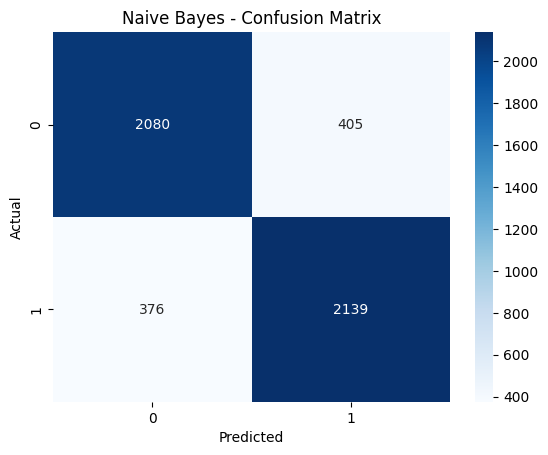

--- SVM ---
Accuracy: 0.8666

Classification Report:
               precision    recall  f1-score   support

         neg       0.87      0.86      0.86      2485
         pos       0.86      0.88      0.87      2515

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



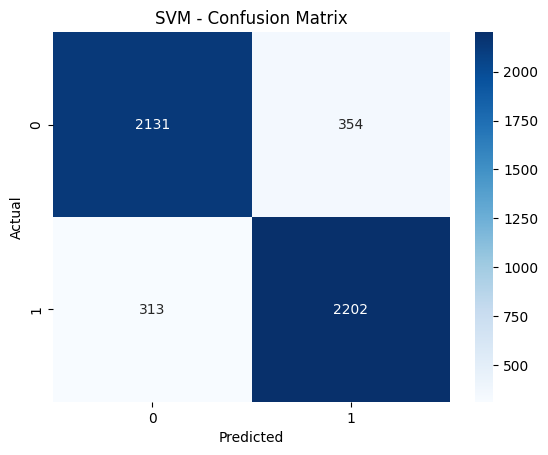

--- Logistic Regression ---
Accuracy: 0.8748

Classification Report:
               precision    recall  f1-score   support

         neg       0.88      0.86      0.87      2485
         pos       0.87      0.89      0.88      2515

    accuracy                           0.87      5000
   macro avg       0.88      0.87      0.87      5000
weighted avg       0.88      0.87      0.87      5000



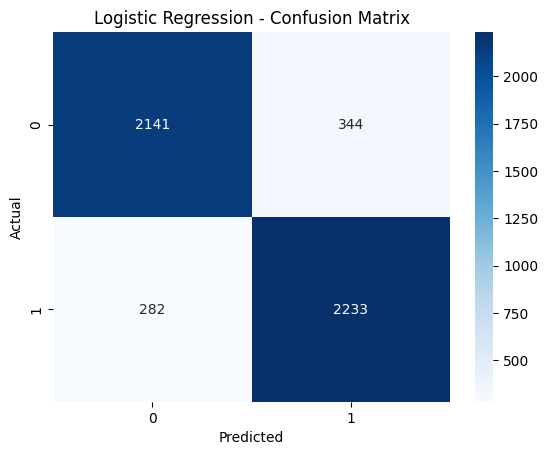

In [62]:
evaluate_model(y_test, nb_pred, "Naive Bayes")
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, lr_pred, "Logistic Regression")

In [63]:
results = pd.DataFrame({
    "Model": ["Naive Bayes", "SVM", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, lr_pred)
    ]
})

results

,Model,Accuracy
0,Naive Bayes,0.8438
1,SVM,0.8666
2,Logistic Regression,0.8748


Best Parameters: {'C': 1, 'penalty': 'l2'}
--- Tuned Logistic Regression ---
Accuracy: 0.8748

Classification Report:
               precision    recall  f1-score   support

         neg       0.88      0.86      0.87      2485
         pos       0.87      0.89      0.88      2515

    accuracy                           0.87      5000
   macro avg       0.88      0.87      0.87      5000
weighted avg       0.88      0.87      0.87      5000



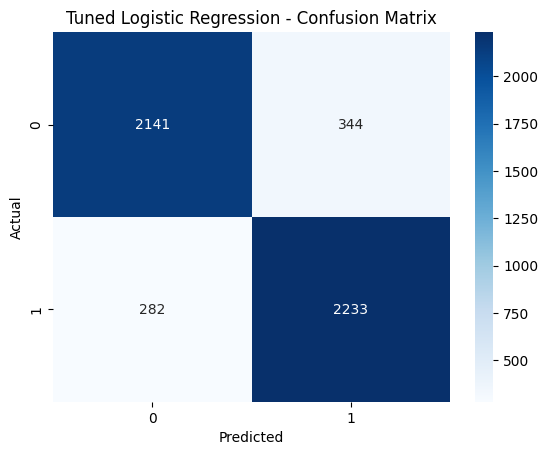

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

evaluate_model(y_test, best_pred, "Tuned Logistic Regression")

In [65]:
##Modularized ML Web Application

In [66]:
import pickle

# Save model
pickle.dump(best_model, open("sentiment_model.pkl", "wb"))

# Save TF-IDF vectorizer
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [67]:
sentiment_model.pkl
tfidf_vectorizer.pkl

NameError: name 'sentiment_model' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
import pickle

pickle.dump(best_model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

X = df['clean_review']
y = df['sentiment']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, logistic_model.predict(X_test)))

# Save
pickle.dump(logistic_model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [ ]:
import os
os.listdir()

In [ ]:
pip install streamlit

In [68]:
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load model and vectorizer
model = pickle.load(open("sentiment_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()   # safer than word_tokenize
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# UI
st.title("Sentiment Analysis Web App 💬")
st.write("Enter a movie/product review and get sentiment prediction")

user_input = st.text_area("Enter your review here:")

if st.button("Predict Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text")
    else:
        clean_text = preprocess_text(user_input)
        vectorized_text = vectorizer.transform([clean_text])
        prediction = model.predict(vectorized_text)[0]

        if prediction == "positive":
            st.success("Predicted Sentiment: POSITIVE 😊")
        elif prediction == "negative":
            st.error("Predicted Sentiment: NEGATIVE 😞")
        else:
            st.info("Predicted Sentiment: NEUTRAL 😐")

2026-02-22 13:44:43.473 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22 13:44:43.496 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2026-02-22 13:44:43.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22 13:44:43.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22 13:44:43.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22 13:44:43.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22 13:44:43.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-22

In [69]:
streamlit
scikit-learn
pandas
numpy
nltk
pickle-mixin

NameError: name 'streamlit' is not defined

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

X = df['clean_review']
y = df['sentiment']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [72]:
pickle.dump(model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [73]:
import os
os.listdir()

['Untitled10.ipynb',
 'Untitled7.ipynb',
 '.eclipse',
 'Music',
 'Cisco Packet Tracer 9.0.0',
 'tfidf_vectorizer.pkl',
 '.zprofile.pysave',
 'Untitled12.ipynb',
 'Untitled5.ipynb',
 'Untitled1.ipynb',
 '.DS_Store',
 'eclipse',
 'nltk_data',
 'notes of ml',
 '.CFUserTextEncoding',
 'kmeans.txt',
 'Untitled3.ipynb',
 'Untitled.ipynb',
 '.packettracer',
 'Untitled4.ipynb',
 'Untitled6.ipynb',
 '.mongodb',
 'Pictures',
 'Untitled11.ipynb',
 '.zprofile',
 '.zsh_history',
 'Untitled2.ipynb',
 '.p2',
 '.ipython',
 'Desktop',
 'Library',
 'eclipse-workspace',
 '.matplotlib',
 '.oracle_jre_usage',
 'Sap.ipynb',
 'Naviotec 1.ipynb',
 '.android',
 'svm',
 'untitled.txt',
 'Sentiment_EDA_Text_Preprocessing.ipynb',
 'Public',
 'Naviotec 7.ipynb',
 'imdb_reviews.csv',
 'Untitled8.ipynb',
 'Movies',
 '.Trash',
 '.ipynb_checkpoints',
 'sentiment_model.pkl',
 '.jupyter',
 '.npm',
 'Documents',
 'Naviotec 2.ipynb',
 'cleaned_reviews.csv',
 '.vscode',
 '.m2',
 'Downloads',
 'Untitled9.ipynb',
 '.zsh_sess